In [1]:
import scipy.stats as sps
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
from array import array
import numpy as np
import math
import pandas as pd
plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
X = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A17'].to_numpy()
Y = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A12'].to_numpy()

n = len(X)

ImportError: ignored

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls",sheet_name='A - aaup' )
X_grp = data.groupby(['A17']).groups
for key in X_grp:
    arr = [0]*len(X_grp[key])
    for i in range(len(X_grp[key])):
        j = X_grp[key][i]
        arr[i] = Y[j]
    X_grp[key] = arr

In [ ]:
n

1073

In [ ]:
k_XY = 0
for i in range(n):
    k_XY += 1/n * (X[i] - X. mean()) * (Y[i] - Y.mean())
rho_XY = k_XY / (X.std() * Y.std())

beta_0 = Y.mean() - rho_XY * Y.std()  * X.mean() / X.std()
beta_1 = rho_XY * Y.std()/X.std()
print("beta_0 = {z:.3f}".format(z = beta_0))
print("beta_1 = {z:.3f}".format(z = beta_1))

beta_0 = 411.462
beta_1 = 0.478


In [ ]:
D_YX = 0

for key in X_grp:
    D_YX += len(X_grp[key]) / n * ((np.array(X_grp[key])).mean() - Y.mean())**2
    
D_res = 0
for i in range(n):
    D_res += 1/n * (Y[i] - (beta_0 + beta_1*X[i]))**2
    
D_Y = 0 
for i in range(n):
    D_Y += ((Y[i] - Y.mean())**2)/n

print(D_YX) # непрпаильно

D_YX = D_Y - D_res
print(D_YX)
print(D_res)
print(D_Y)

2667.6827355639093
1246.0556604276098
4260.423273048401
5506.478933476011


In [ ]:
#несмещенные оценки
k = 2
print((n*D_YX)/(k-1))
print((n*D_res)/(n-k))
print((n*D_Y)/(n-1))

1337017.7236388254
4268.379245547091
5511.615574272164


In [ ]:
print("Коэффициент детерминации: {z}".format(z = (D_YX/D_Y)))
print("Кореляционное отношение: {z}".format(z = (D_YX/D_Y)**(1/2)))


Коэффициент детерминации: 0.22628900890773532
Кореляционное отношение: 0.47569844324712196


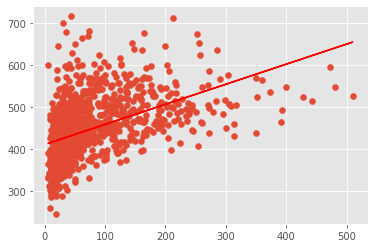

In [ ]:
# просто посмотреть
plt.scatter(X, Y)
lin_reg = beta_1*X + beta_0
plt.plot(X, lin_reg, color='red')

In [ ]:
new_D_res = 0
for i in range(n):
    new_D_res += ((Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean()) - Y[i])**2)/(n-2)

X_sum = 0
for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = [0.01, 0.05, 0.1]
for a in alpha:
    print(a)
    beta_0_lower = beta_0 - sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var())) 
    beta_0_upper = beta_0 + sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res * X_sum / (n**2 * X.var()))
    beta_1_lower = beta_1 - sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n * X.var())) 
    beta_1_upper = beta_1 + sps.t(n-2).ppf(1-a/2)*math.sqrt(new_D_res / (n * X.var())) 
    print("Нижняя граница b0: {z:.3f}".format(z = beta_0_lower))
    print("Верхняя граница b0: {z:.3f}".format(z = beta_0_upper))
    print("Нижняя граница b1: {z:.3f}".format(z = beta_1_lower))
    print("Верхняя граница b1: {z:.3f}".format(z = beta_1_upper))

0.01
Нижняя граница b0: 404.212
Верхняя граница b0: 418.711
Нижняя граница b1: 0.409
Верхняя граница b1: 0.548
0.05
Нижняя граница b0: 405.949
Верхняя граница b0: 416.975
Нижняя граница b1: 0.425
Верхняя граница b1: 0.531
0.1
Нижняя граница b0: 406.837
Верхняя граница b0: 416.087
Нижняя граница b1: 0.434
Верхняя граница b1: 0.523


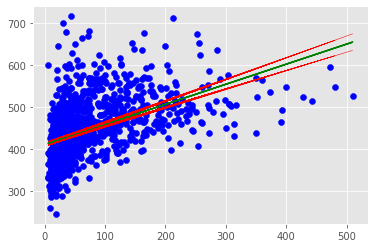

In [ ]:
X_sum = 0

for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = 0.1
flow = []
fhigh = []

for i in range(n):
    flow.append((Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean())) - sps.t(n-2).ppf(1-alpha/2)*(new_D_res*(1/n + (X[i] - X.mean())**2/(n*X.var())))**(1/2))
    fhigh.append((Y.mean() + rho_XY * Y.std()/X.std() * (X[i] - X.mean())) + sps.t(n-2).ppf(1-alpha/2)*(new_D_res*(1/n + (X[i] - X.mean())**2/(n*X.var())))**(1/2))

plt.scatter(X, Y, color='blue')
lin_reg = beta_1*X + beta_0


plt.plot(X, lin_reg, color='green')
plt.plot(X, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(X, flow, linestyle = '-', color='red', linewidth = 0.5)

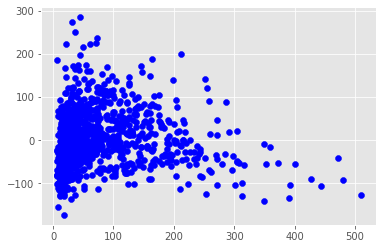

In [ ]:
remainses = Y - (beta_1*X + beta_0)
plt.scatter(X, remainses, color='blue')

In [ ]:
R_YX = 1 - D_res/D_Y
z = R_YX / ((1 - R_YX ) / (n - 2))
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z = z , p_value = 1 - sps.f(1, n - 2).cdf(z)))

Sign test: z = 313.238, p-value = 0.000


In [ ]:
#п9.2

X_2 = []
for a in X:
    X_2.append(a**2)

regression_matrix = np.array([np.array([1]*len(X)), X, X_2]).transpose()

F = np.dot(regression_matrix.transpose(), regression_matrix)
result = np.dot(np.linalg.inv(F), regression_matrix.transpose())
result = np.dot(result, Y)
beta_0 = result[0] 
beta_1 = result[1]
beta_2 = result[2]
print("beta0 = {z1:.1f} \nbeta1 = {z2:.1f} \nbeta2 = {z3:.1f}".format(z1 = result[0], z2 = result[1], z3 = result[2]))

beta0 = 389.2 
beta1 = 1.1 
beta2 = -0.0


In [ ]:
beta_1

1.072495486973355

In [ ]:
D_YX = 0
k = 3
for key in X_grp:
    D_YX += len(X_grp[key]) / (n-k) * ((np.array(X_grp[key])).mean() - Y.mean())**2
    
D_res = 0
for i in range(n):
    D_res += 1/n * (Y[i] - (beta_0 + beta_1*X[i] + beta_2*(X[i])**2))**2
    
D_Y = 0 
for i in range(n):
    D_Y += 1/n * (Y[i] - Y.mean())**2

print(D_YX) # непрпаильно

D_YX = D_Y - D_res
print("Факторный признак: {z:.2f}".format(z = D_YX))
print("Остаточные признаки: {z:.2f}".format(z = D_res))
print("Все признаки: {z:.2f}".format(z = D_Y))

2675.1622198692285
Факторный признак: 1599.07
Остаточные признаки: 3907.41
Все признаки: 5506.48


In [ ]:
#несмещенные оценки
k = 3
print((n*D_YX)/(k-1))
print((n*D_res)/(n-k))
print((n*D_Y)/(n-1))

857901.1696363953
3918.3640713523073
5511.615574272164


In [ ]:
print("Коэффициент детерминации: {z}".format(z = (D_YX/D_Y)))
print("Кореляционное отношение: {z}".format(z = (D_YX/D_Y)**(1/2)))


Коэффициент детерминации: 0.29039795357305076
Кореляционное отношение: 0.5388858446582641


In [ ]:
#df = pd.DataFrame({'X': X, 'Y': Y})
#df = df.sort_values('X')

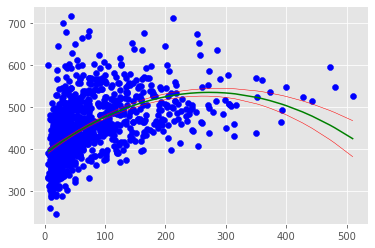

In [ ]:
X_sum = 0
k = 3

new_D_res = 0
for i in range(n):
    new_D_res += 1/(n-k) * ((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) - Y[i])**2

for i in range(len(X)):
    X_sum += (X[i])**2 
alpha = 0.1
flow = []
fhigh = []
for i in range(n):
    flow.append((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) - sps.t(n-k).ppf(1-alpha/2)*(new_D_res*(np.dot(np.dot(np.array([1, X[i], X[i]**2]).transpose(), np.linalg.inv(F)), np.array([1, X[i], X[i]**2])))  )**(1/2))
    fhigh.append((beta_2 * X[i]**2 + beta_1 * X[i] + beta_0) + sps.t(n-k).ppf(1-alpha/2)*(new_D_res*(np.dot(np.dot(np.array([1, X[i], X[i]**2]).transpose(), np.linalg.inv(F)), np.array([1, X[i], X[i]**2])))  )**(1/2))

df = pd.DataFrame({'X': X, 'Y': Y, 'flow': flow, 'fhigh': fhigh})
df = df.sort_values('X')

X = df['X'].to_numpy()
Y = df['Y'].to_numpy()
flow = df['flow'].to_numpy()
fhigh = df['fhigh'].to_numpy()

plt.scatter(X, Y, color='blue')

lin_reg = []
for i in range(n):
  lin_reg.append(beta_2 * X[i]**2 + beta_1*X[i] + beta_0)


plt.plot(X, lin_reg, color='green')
plt.plot(X, fhigh, linestyle = '-',color='red', linewidth = 0.5)
plt.plot(X, flow, linestyle = '-', color='red', linewidth = 0.5)

думаю, надо сделать дата фрейм из x и y, а затем отсортировать по х и построить график, но я не уверен


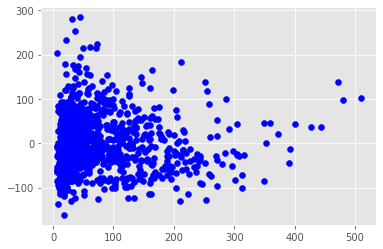

In [ ]:
remainses = Y - (beta_2 * X**2 + beta_1*X + beta_0)
plt.scatter(X, remainses, color='blue')

In [ ]:
R_YX = 1 - D_res/D_Y
z = (R_YX / (k-1)) / ((1 - R_YX ) / (n - k))
print('Sign test: z = {z:.3f}, p-value = {p_value:.3f}'.format(z = z , p_value = 1 - sps.f(k-1, n-k).cdf(z)))

Sign test: z = 218.944, p-value = 0.000


In [ ]:
#Множественная линейная регрессионная модель

X1 = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A17'].to_numpy()
X2 = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A7'].to_numpy()
Y = pd.read_excel(open('/content/drive/MyDrive/Study MePHI/сем5/matstat/HW/data_matstat_K5.xls', 'rb'), sheet_name='A - aaup')['A12'].to_numpy()


In [ ]:
regression_matrix = np.array([np.array([1]*len(X1)), X1, X2]).transpose()

F = np.dot(regression_matrix.transpose(), regression_matrix)
result = np.dot(np.linalg.inv(F), regression_matrix.transpose())
result = np.dot(result, Y)
beta_0 = result[0] 
beta_1 = result[1]
beta_2 = result[2]
print("beta0 = {z1:.1f} \nbeta1 = {z2:.1f} \nbeta2 = {z3:.1f}".format(z1 = result[0], z2 = result[1], z3 = result[2]))

beta0 = -30.7 
beta1 = -0.0 
beta2 = 1.3


In [ ]:
D_YX = 0
k = 3
#for key in X_grp:
#    D_YX += len(X_grp[key]) / (n-k) * ((np.array(X_grp[key])).mean() - Y.mean())**2
    
D_res = 0
for i in range(n):
    D_res += 1/n * (Y[i] - (beta_0 + beta_1*X1[i] + beta_2*X2[i]))**2
    
D_Y = 0 
for i in range(n):
    D_Y += 1/n * (Y[i] - Y.mean())**2

print(D_YX) # непрпаильно

D_YX = D_Y - D_res
print("Факторный признак: {z:.2f}".format(z = D_YX))
print("Остаточные признаки: {z:.2f}".format(z = D_res))
print("Все признаки: {z:.2f}".format(z = D_Y))

0
Факторный признак: 5203.97
Остаточные признаки: 302.51
Все признаки: 5506.48


In [ ]:
#несмещенные оценки
k = 3
print((n*D_YX)/(k-1))
print((n*D_res)/(n-k))
print((n*D_Y)/(n-1))

2791927.6369952424
303.3613286254903
5511.615574272164


In [ ]:
print("Коэффициент детерминации: {z}".format(z = (D_YX/D_Y)))
print("Кореляционное отношение: {z}".format(z = (D_YX/D_Y)**(1/2)))

Коэффициент детерминации: 0.9450623230308577
Кореляционное отношение: 0.972143159740816


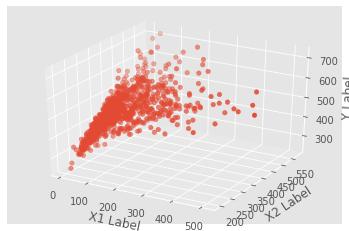

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()

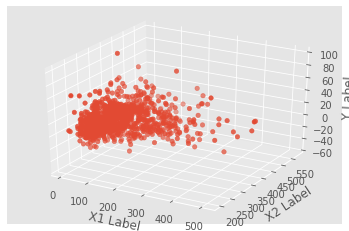

In [ ]:
remainses = Y - (beta_0 + beta_1 * X1 + beta_2 * X2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X1, X2, remainses)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
ax.set_zlabel('Y Label')

plt.show()